In [ ]:
!pip install poissongeometry
!pip install galgebra==0.4.3
!pip install sympy==1.7
!pip install numericalpoissongeometry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached poissongeometry-1.0.2-py3-none-any.whl (17 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached galgebra-0.4.3-py3-none-any.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sympy-1.7-py3-none-any.whl (5.9 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numericalpoissongeometry-1.1.1-py3-none-any.whl (14 kB)
  Using cached permutation-0.3.1-py3-none-any.whl (9.3 kB)


In [134]:
import sympy as sp
import sympy.matrices.matrices
from sympy.solvers.pde import pdsolve
from sympy import Function, Eq
from sympy.abc import x, y,z,u,v,w
from poisson.poisson import PoissonGeometry as pg
from numpoisson.numpoisson import NumPoissonGeometry as npg
import pprint 
pp = pprint.PrettyPrinter(indent=2)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

# Sistemas integrables en foliaciones simplécticas

Se define la variedad simpléctica $so(3)^*$ como una variedad de dimensión 3, equipada con un bivector de poisson 
$$ \pi= x \frac{\partial }{\partial y}\wedge\frac{\partial}{\partial z}+y \frac{\partial }{\partial z}\wedge\frac{\partial}{\partial x}+z \frac{\partial }{\partial x}\wedge\frac{\partial}{\partial y} $$
que induce el corchete de Poisson correspondiente sobre el espacio.

$$ \{x,y\}=z  $$
$$ \{y,z\}=x  $$
$$ \{z,x\}=y  $$



In [2]:
p3 = pg(3)
p3.dim
p3.coordinates
bivector_so3 = {(1,2): 'x3',(1,3): '-x2',(2,3): 'x1'}

x1_x2_so3 = p3.poisson_bracket(bivector_so3, 'x1', 'x2')
x2_x3_so3 = p3.poisson_bracket(bivector_so3, 'x2', 'x3')
x3_x1_so3 = p3.poisson_bracket(bivector_so3, 'x3', 'x1')

print(F'{{x1, x2}} = {x1_x2_so3}')
print(F'{{x2, x3}} = {x2_x3_so3}')
print(F'{{x3, x1}} = {x3_x1_so3}')

p3.bivector_to_matrix(bivector_so3)

{x1, x2} = x3
{x2, x3} = x1
{x3, x1} = x2


Matrix([
[  0,  x3, -x2],
[-x3,   0,  x1],
[ x2, -x1,   0]])

In [3]:
alpha_so3 = {(1,): 'x1', (2,): 'x2', (3,): 'x3'}

p3.sharp_morphism(bivector_so3, alpha_so3)

{}

el corchete es invariante de rotaciones por lo cual la función casimir es definida como
$$ 2K = x^2+y^2+z^2  $$


In [4]:
K_so3 = '(1/2)*(x1**2+x2**2+x3**2)'
p3.is_casimir(bivector_so3,K_so3)

True

El teorema ()  indica que se pueden caracterizar las foliaciones simplécticas de la variedad por medio de ssus funciones casimir:






Por lo tanto, las foliaciones simplécticas de $so(3)^*$ vienen dadas por cascarones esféricos (donde $K$ es constante).

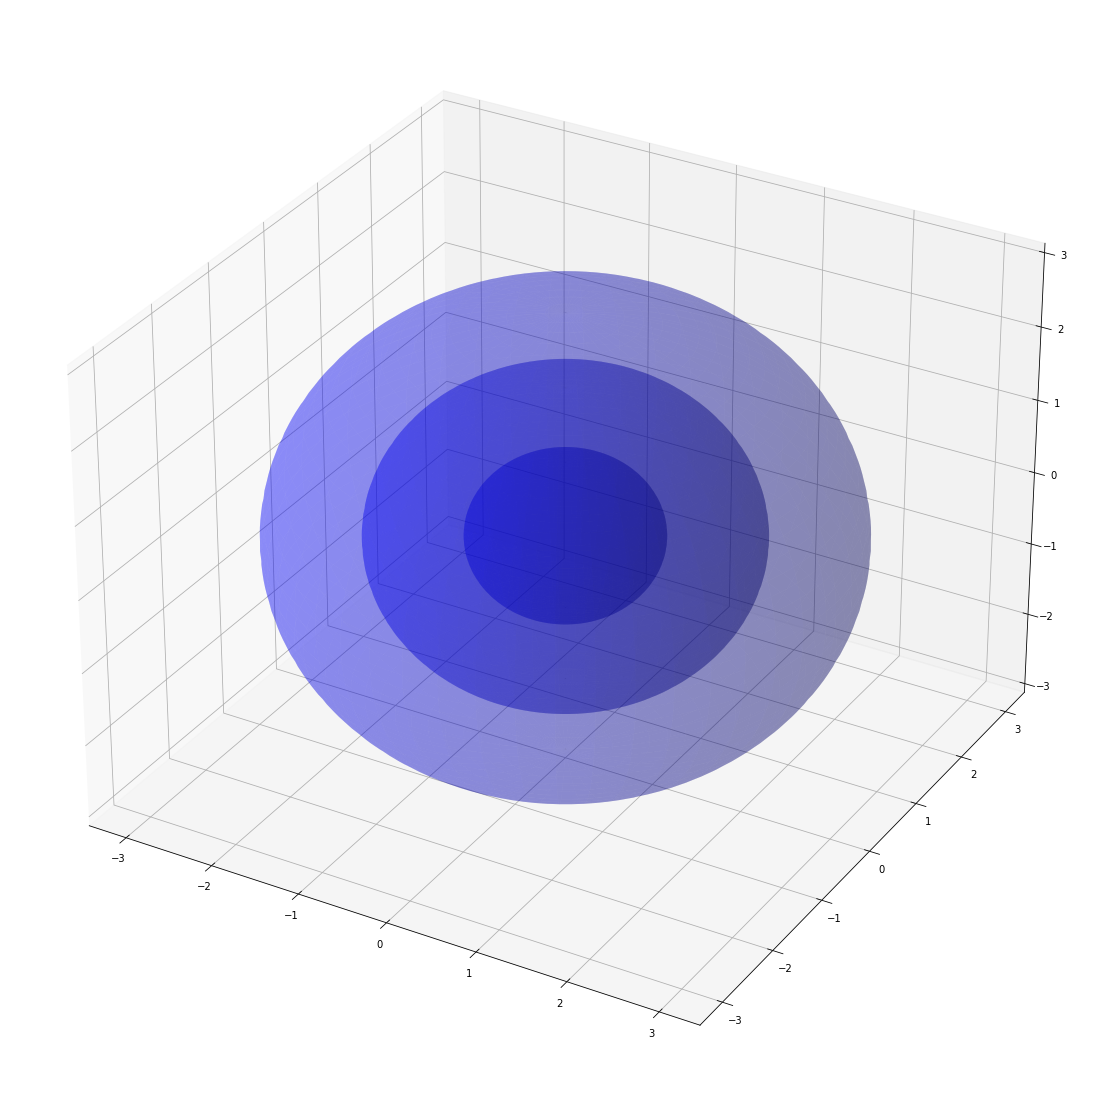

In [5]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for r in range(4):
  # Make data
  u = np.linspace(0, 2 * np.pi, 100)
  v = np.linspace(0, np.pi, 100)
  x = r * np.outer(np.cos(u), np.sin(v))
  y = r * np.outer(np.sin(u), np.sin(v))
  z = r * np.outer(np.ones(np.size(u)), np.cos(v))
  # Plot the surface
  ax.plot_surface(x, y, z, color='b',alpha=0.25)
plt.show()

se plantean los hamiltonianos 
$$ H_1 = x^2+y^2 $$
$$ H_2 = x^2+z^2 $$
$$ H_3 = y^2+z^2 $$
$$ H_4 = x^2 $$
$$ H_5 = y^2 $$
$$ H_6 = z^2 $$
y se calculan los campos vectoriales hamiltonianos tal que 
$$ X_H(f) = \{H,f\} = \pi(\mathrm{d}H,\mathrm{d}f)$$

In [67]:
h = ['x1**2 + x2**2 ','x1**2+x3**2','x2**2+x3**2','x1**2','x2**2','x3**2']
for H in h:
    print("EL campo vectorial hamiltoniano para ", H, " es")
    pp.pprint(p3.hamiltonian_vf(bivector_so3, H))
    print("--------------------------------------------------------------------------------")

EL campo vectorial hamiltoniano para  x1**2 + x2**2   es
{(1,): '-2*x2*x3', (2,): '2*x1*x3'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x1**2+x3**2  es
{(1,): '2*x2*x3', (3,): '-2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x2**2+x3**2  es
{(2,): '-2*x1*x3', (3,): '2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x1**2  es
{(2,): '2*x1*x3', (3,): '-2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x2**2  es
{(1,): '-2*x2*x3', (3,): '2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x3**2  es
{(1,): '2*x2*x3', (2,): '-2*x1*x3'}
----------------------------------------------------------------------

sobre cada cascarón esférico, donde
$$ x = r\sin\theta\cos\phi,\; y=r\sin\theta\sin\phi,\; z= r\cos\theta$$

 el bivector toma la forma 
$$ \pi = \frac{1}{r\sin\theta}\frac{\partial}{\partial\theta}\wedge\frac{\partial}{\partial\phi} $$

de manera que un sistema integrable es definido por una función $f$ tal que 
$$ \{H,f\}=\pi(\mathrm{d}H,\mathrm{d}f)=\frac{1}{r\sin\theta}\left[\frac{\partial H}{\partial\theta}\frac{\partial f}{\partial\phi}-\frac{\partial f}{\partial\theta}\frac{\partial H}{\partial\phi}\right]=0 $$

In [63]:
f = Function('f')
u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)
R = 1
h_diff = [(R**2)*(sp.sin(x)**2),(R**2)*(sp.sin(x)**2*sp.cos(y)**2+sp.cos(x)**2),(R**2)*(sp.sin(x)**2*sp.sin(y)**2+sp.cos(x)**2),(R**2)*(sp.sin(x)**2+sp.cos(y)**2),(R**2)*(sp.sin(x)**2*sp.sin(y)**2), (R**2)*sp.cos(x)**2 ]
Sol = []
for H in h_diff:
    eq = Eq((1/(R*(sp.sin(x))))*(H.diff(x)*uy-ux*H.diff(y)),0)
    solution = pdsolve(eq)
    Sol.append(solution)
    print("la ecuación diferencial a resolver es: ")
    print(eq)
    print("con solución:")
    print(solution)
    print("--------------------------------------------")

la ecuación diferencial a resolver es: 
Eq(2*cos(x)*Derivative(f(x, y), y), 0)
con solución:
Eq(f(x, y), F(x))
--------------------------------------------
la ecuación diferencial a resolver es: 
Eq(((2*sin(x)*cos(x)*cos(y)**2 - 2*sin(x)*cos(x))*Derivative(f(x, y), y) + 2*sin(x)**2*sin(y)*cos(y)*Derivative(f(x, y), x))/sin(x), 0)
con solución:
Eq(f(x, y), F(sin(x)*sin(y)))
--------------------------------------------
la ecuación diferencial a resolver es: 
Eq(((2*sin(x)*sin(y)**2*cos(x) - 2*sin(x)*cos(x))*Derivative(f(x, y), y) - 2*sin(x)**2*sin(y)*cos(y)*Derivative(f(x, y), x))/sin(x), 0)
con solución:
Eq(f(x, y), F(sin(x)*cos(y)))
--------------------------------------------
la ecuación diferencial a resolver es: 
Eq((2*sin(x)*cos(x)*Derivative(f(x, y), y) + 2*sin(y)*cos(y)*Derivative(f(x, y), x))/sin(x), 0)
con solución:
Eq(f(x, y), F(-cos(2*x) + cos(2*y)))
--------------------------------------------
la ecuación diferencial a resolver es: 
Eq((-2*sin(x)**2*sin(y)*cos(y)*Derivative(

Para el Hamiltoniano de la rotación de un sólido
$$ H = \frac{x^2}{2I_1}+\frac{y^2}{2I_2}+\frac{z^2}{2I_3} $$
se calcula su campo vectorial asociado
$$ X_H(f)= \{H,f\}$$

In [21]:
I1 = 1
I2 = 1
I3 = 1
H = '(x1**2)/(2*3)+(x2**2)/(2*2)+(x3**2)/(2)'
p3.hamiltonian_vf(bivector_so3,H)

{(1,): 'x2*x3/2', (2,): '-2*x1*x3/3', (3,): 'x1*x2/6'}

In [22]:
def fibonacci_sphere(r,samples=1000):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = r*(1 - (i / float(samples - 1)) * 2) # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points

In [23]:
S2 = fibonacci_sphere(1,samples=1000)

In [24]:
np3 = npg(3)
vector = np3.num_hamiltonian_vf(bivector_so3, H, S2) 
U = [vector[i][0][0] for i in range(len(vector))]
V = [vector[i][1][0] for i in range(len(vector))]
W = [vector[i][2][0] for i in range(len(vector))]

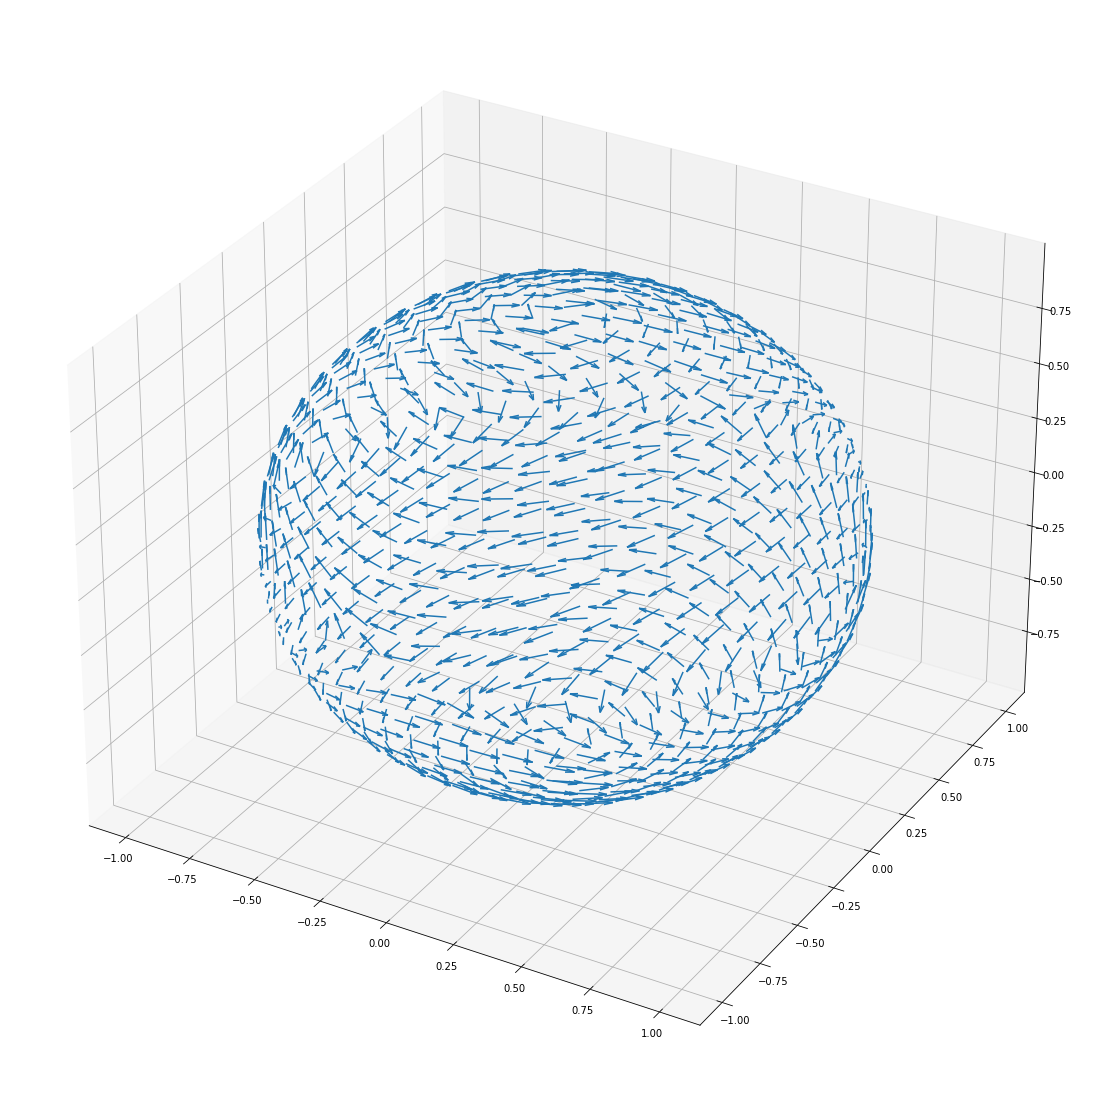

In [25]:
ax = plt.figure(figsize =(20,20)).add_subplot(projection='3d')
r,samples = 1, 1000
X = []
Y = []
Z = []
phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians
for i in range(samples):
  y = r*(1 - (i / float(samples - 1)) * 2) # y goes from 1 to -1
  radius = math.sqrt(1 - y * y)  # radius at y
  theta = phi * i  # golden angle increment
  x = math.cos(theta) * radius
  z = math.sin(theta) * radius
  X.append(x)
  Y.append(y)
  Z.append(z)
ax.quiver(X, Y, Z, U, V, W, length=0.1, normalize=True)
plt.show()

In [31]:
f = Function('f')
u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)
R = 1
hamiltonian = ((R*sp.sin(x)*sp.cos(y))**2)/(2*3)+((R*sp.sin(x)*sp.sin(y))**2)/(2*2)+((R*sp.cos(x))**2)/(2)
eq = Eq((1/(R*(sp.sin(x))))*(hamiltonian.diff(x)*uy-ux*hamiltonian.diff(y)),0)
solution = pdsolve(eq)
Sol.append(solution)
print("la ecuación diferencial a resolver es: ")
print(eq)
print("con solución:")
print(solution)
print("--------------------------------------------")

la ecuación diferencial a resolver es: 
Eq(((sin(x)*sin(y)**2*cos(x)/2 + sin(x)*cos(x)*cos(y)**2/3 - sin(x)*cos(x))*Derivative(f(x, y), y) - sin(x)**2*sin(y)*cos(y)*Derivative(f(x, y), x)/6)/sin(x), 0)
con solución:
Eq(f(x, y), F(-log(cos(2*y) + 7)/2 - log(sin(x))))
--------------------------------------------


Se define la variedad simpléctica $sl(2)^*$ como una variedad de dimensión 3, equipada con un bivector de poisson 
$$ \pi= x \frac{\partial }{\partial y}\wedge\frac{\partial}{\partial z}+y \frac{\partial }{\partial z}\wedge\frac{\partial}{\partial x}-z \frac{\partial }{\partial x}\wedge\frac{\partial}{\partial y} $$
que induce el corchete de Poisson correspondiente sobre el espacio.

$$ \{x,y\}=-z  $$
$$ \{y,z\}=x  $$
$$ \{z,x\}=y  $$


In [26]:
bivector_sl2 ={(1,2): '-x3', (1,3): '-x2', (2,3): 'x1'}
x1_x2_sl2 = p3.poisson_bracket(bivector_sl2, 'x1', 'x2')
x2_x3_sl2 = p3.poisson_bracket(bivector_sl2, 'x2', 'x3')
x3_x1_sl2 = p3.poisson_bracket(bivector_sl2, 'x3', 'x1')
print(F'{{x1, x2}} = {x1_x2_sl2}')
print(F'{{x2, x3}} = {x2_x3_sl2}')
print(F'{{x3, x1}} = {x3_x1_sl2}')

{x1, x2} = -x3
{x2, x3} = x1
{x3, x1} = x2


In [ ]:
alpha_sl2 = {(1,): 'x1', (2,): 'x2', (3,): '-x3'}
p3.sharp_morphism(bivector_sl2, alpha_sl2)

{}

la función casimir es definida como
$$ 2K = x^2+y^2-z^2  $$
que deja invariante la métrica 
$$ s^2=x^2+y^2-z^2   $$

In [ ]:
K = 'x1**2+x2**2-x3**2'
p3.is_casimir(bivector_sl2,K)

True

/tmp/ipykernel_49273/3021660855.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_49273/3021660855.py:15: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt((X**2 + Y**2) + r)


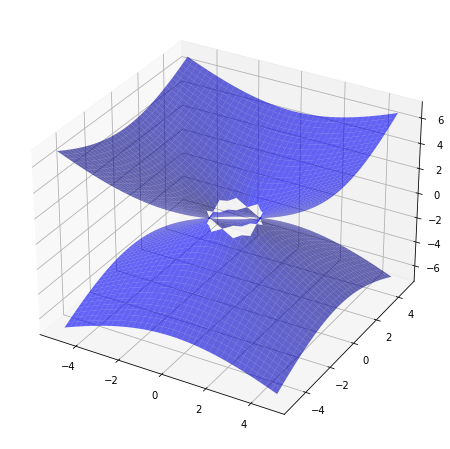

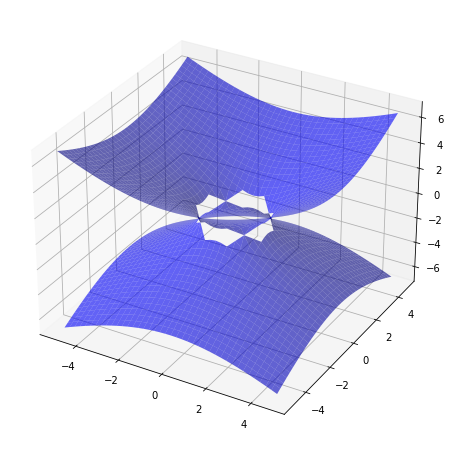

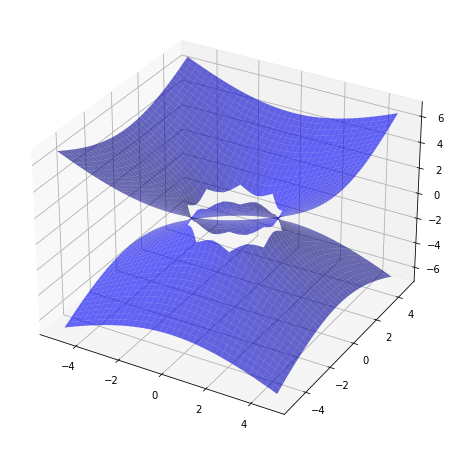

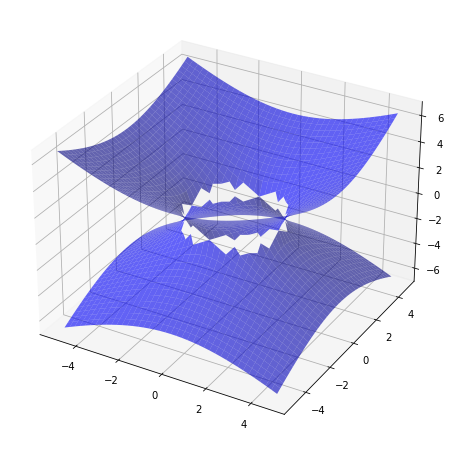

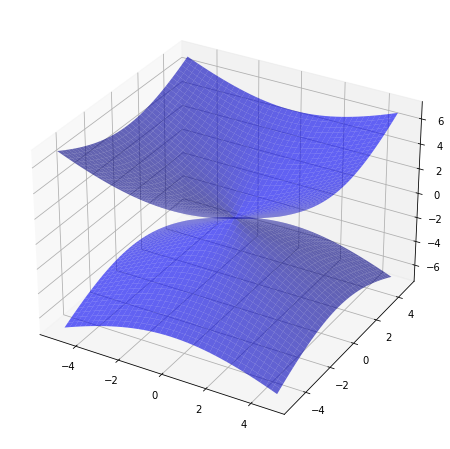

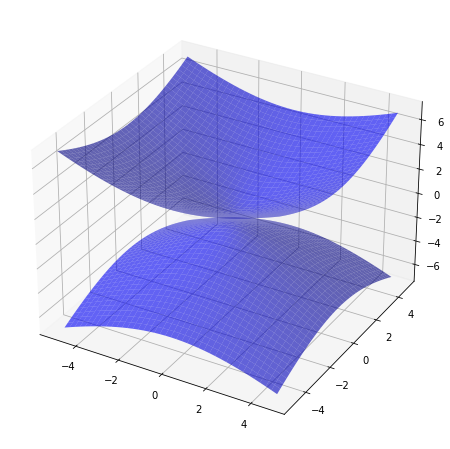

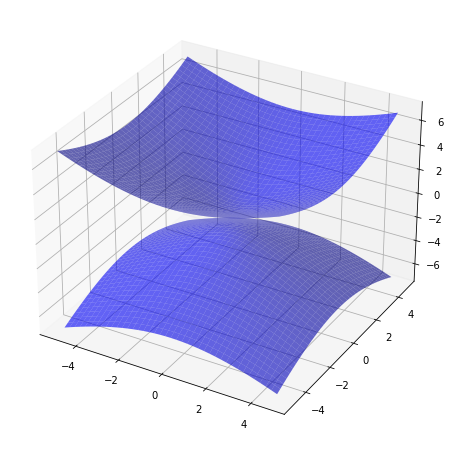

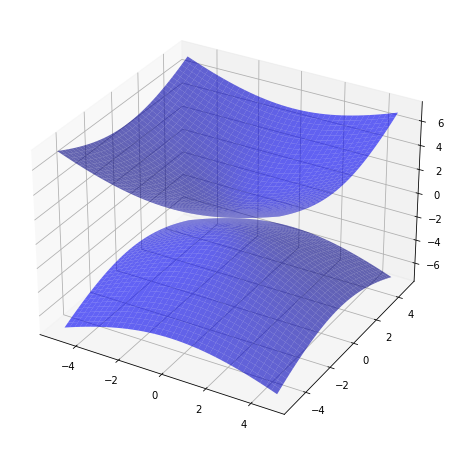

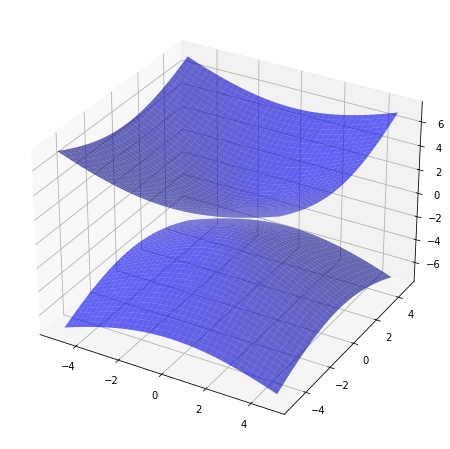

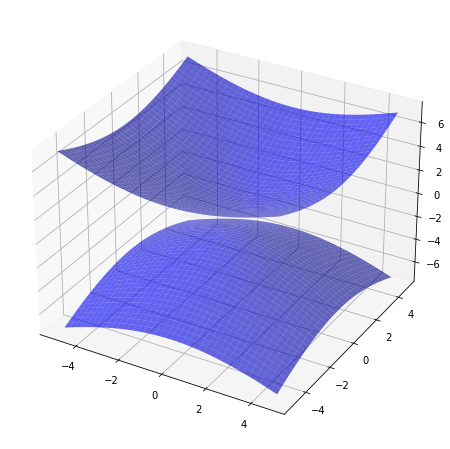

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np




for r in [-1,-2,-3,-4,0,1,2,3,4,5]:
    fig = plt.figure(figsize=(8,8))  # Square figure
    ax = fig.gca(projection='3d')
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)

    Z = np.sqrt((X**2 + Y**2) + r)
    
    ax.plot_surface(X, Y, Z, color='b', alpha=0.6, vmin=-5, vmax=5)
    ax.plot_surface(X, Y, -Z, color='b', alpha=0.6, vmin=-5, vmax=5)
    
    plt.show()

se plantean los hamiltonianos 
$$ H_1 = x^2+y^2 $$
$$ H_2 = x^2+z^2 $$
$$ H_3 = y^2+z^2 $$
$$ H_4 = x^2 $$
$$ H_5 = y^2 $$
$$ H_6 = z^2 $$
y se calculan los campos vectoriales hamiltonianos tal que 
$$ X_H(f) = \{H,f\} = \pi(\mathrm{d}H,\mathrm{d}f)$$

In [68]:
for H in h:
    print("EL campo vectorial hamiltoniano para ", H, " es")
    pp.pprint(p3.hamiltonian_vf(bivector_sl2, H))
    print("--------------------------------------------------------------------------------")

EL campo vectorial hamiltoniano para  x1**2 + x2**2   es
{(1,): '2*x2*x3', (2,): '-2*x1*x3'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x1**2+x3**2  es
{(1,): '2*x2*x3', (2,): '-4*x1*x3', (3,): '-2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x2**2+x3**2  es
{(1,): '4*x2*x3', (2,): '-2*x1*x3', (3,): '2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x1**2  es
{(2,): '-2*x1*x3', (3,): '-2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x2**2  es
{(1,): '2*x2*x3', (3,): '2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x3**2  es
{(1,): '2*x2*x3', (2,): '-2*x1*x3'}
-----------------------------------

sobre cada hoja hiperbólica, donde
$$ x = r\sinh\theta\cos\phi,\; y=r\sinh\theta\sin\phi,\; z= r\cosh\theta$$

 el bivector toma la forma 
$$ \pi = \frac{1}{\sinh\theta}\frac{\partial}{\partial\theta}\wedge\frac{\partial}{\partial\phi} $$

de manera que un sistema integrable es definido por una función $f$ tal que 
$$ \{H,f\}=\pi(\mathrm{d}H,\mathrm{d}f)=\frac{1}{\sinh\theta}\left[\frac{\partial H}{\partial\theta}\frac{\partial f}{\partial\phi}-\frac{\partial f}{\partial\theta}\frac{\partial H}{\partial\phi}\right]=0 $$

In [135]:
from sympy.solvers.pde import pdsolve
from sympy import Function, Eq
f = Function('f')
u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)
R = 1
h_diff = [(R**2)*(sp.sinh(x)**2),(R**2)*(sp.sinh(x)**2*sp.sin(y)**2+sp.cosh(x)**2),(R**2)*(sp.sinh(x)**2+sp.cos(y)**2),(R**2)*(sp.sinh(x)**2*sp.sin(y)**2), (R**2)*sp.cosh(x)**2 ]
Sol = []
for H in h_diff:
    i=1
    eq = Eq((1/((sp.sinh(x))))*(H.diff(x)*uy-ux*H.diff(y)),0)
    print(i)
    print("la ecuación diferencial a resolver es: ")
    print(eq)    
    solution = pdsolve(eq, hint = "all")
    Sol.append(solution)
    print("con solución:")
    print(solution)
    print("--------------------------------------------")
    i=i+1

1
la ecuación diferencial a resolver es: 
Eq(2*cosh(x)*Derivative(f(x, y), y), 0)
con solución:
{'order': 1, 'default': '1st_linear_variable_coeff', '1st_linear_variable_coeff': Eq(f(x, y), F(x))}
--------------------------------------------
1
la ecuación diferencial a resolver es: 
Eq(((2*sin(y)**2*sinh(x)*cosh(x) + 2*sinh(x)*cosh(x))*Derivative(f(x, y), y) - 2*sin(y)*cos(y)*sinh(x)**2*Derivative(f(x, y), x))/sinh(x), 0)


TypeError: 'NoneType' object is not subscriptable

Para el Hamiltoniano de la rotación de un sólido
$$ H = \frac{x^2}{2I_1}+\frac{y^2}{2I_2}+\frac{z^2}{2I_3} $$
se calcula su campo vectorial asociado
$$ X_H(f)= \{H,f\}$$

In [115]:
I1 = 1
I2 = 1
I3 = 1
H = '(x1**2)/(2*3)+(x2**2)/(2*2)+(x3**2)/(2)'
p3.hamiltonian_vf(bivector_sl2,H)

{(1,): '3*x2*x3/2', (2,): '-4*x1*x3/3', (3,): 'x1*x2/6'}

In [96]:
def hyperbolic_folds(S):

    u=np.linspace(-2,2,S)
    v=np.linspace(0,2*np.pi,60)
    points = []
    for U in u:
        for V in v:
            x = np.cosh(U)*np.cos(V)
            y = np.cosh(U)*np.sin(V)
            z = np.sinh(U)
            points.append((x,y,z))


    return points

In [129]:
H2 = hyperbolic_folds(200)

In [131]:
np3 = npg(3)
vector2 = np3.num_hamiltonian_vf(bivector_sl2, H, H2) 
U2 = [vector2[i][0][0] for i in range(len(vector2))]
V2 = [vector2[i][1][0] for i in range(len(vector2))]
W2 = [vector2[i][2][0] for i in range(len(vector2))]

In [120]:
print(vector2)

[[[-0.00000000e+00]
  [ 1.81932781e+01]
  [-0.00000000e+00]]

 [[-2.17555532e+00]
  [ 1.80902096e+01]
  [ 2.49327855e-01]]

 [[-4.32646072e+00]
  [ 1.77821717e+01]
  [ 4.87387782e-01]]

 ...

 [[-4.32646072e+00]
  [-1.77821717e+01]
  [-4.87387782e-01]]

 [[-2.17555532e+00]
  [-1.80902096e+01]
  [-2.49327855e-01]]

 [[-5.01307646e-15]
  [-1.81932781e+01]
  [-5.77793112e-16]]]


(12000,)
(12000,)
(12000,)
(12000,)
(12000,)
(12000,)


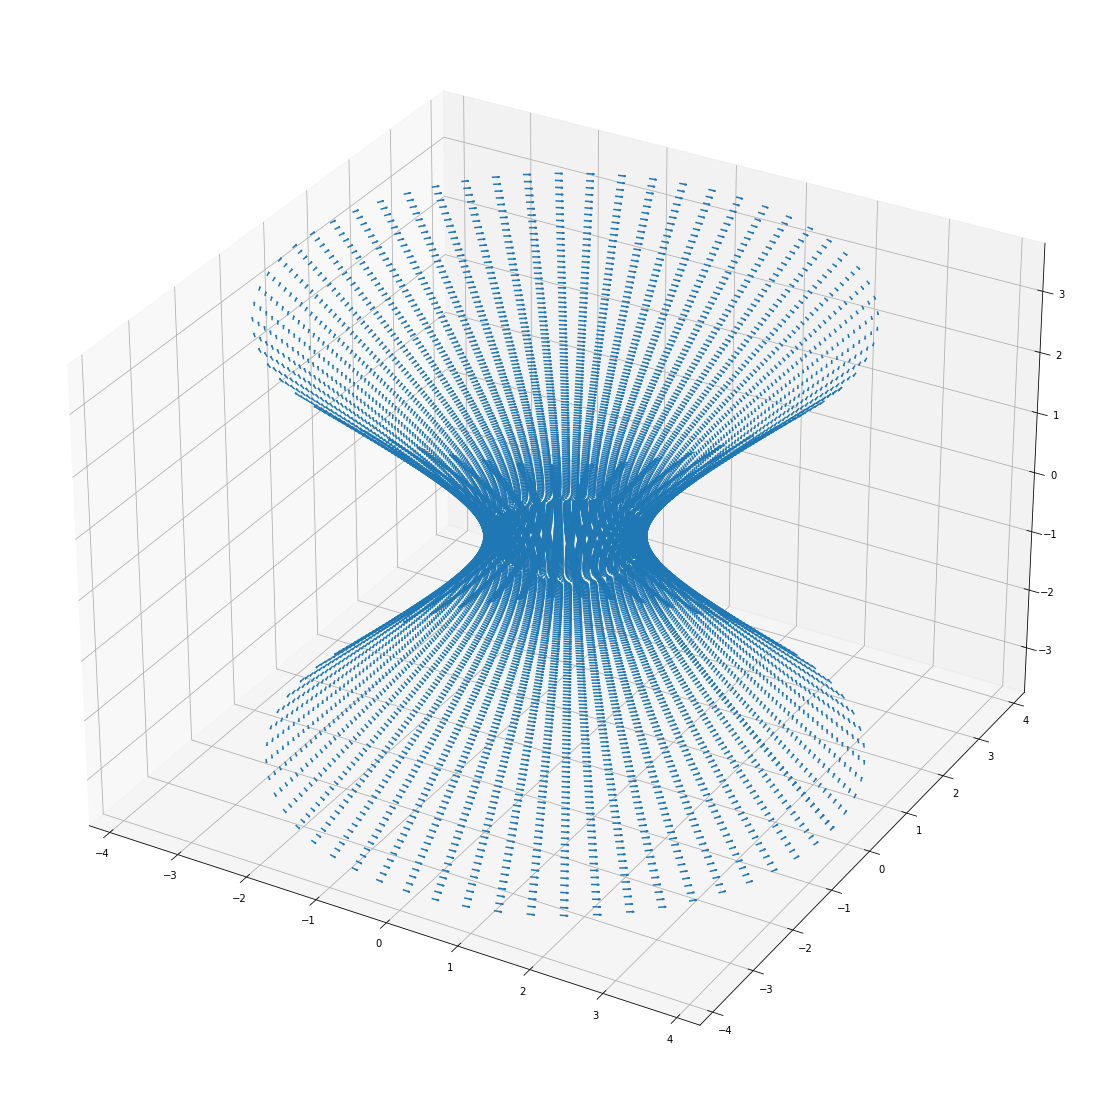

In [132]:
ax = plt.figure(figsize =(20,20)).add_subplot(projection='3d')
S = 200
X2 = []
Y2 = []
Z2 = []

u=np.linspace(-2,2,S)
v=np.linspace(0,2*np.pi,60)
for U in u:
    for V in v:
        x = np.cosh(U)*np.cos(V)
        y = np.cosh(U)*np.sin(V)
        z = np.sinh(U)
        X2.append(x)
        Y2.append(y)
        Z2.append(z)
print(np.shape(X2))
print(np.shape(Y2))
print(np.shape(Z2))
print(np.shape(U2))
print(np.shape(V2))
print(np.shape(W2))
ax.quiver(X2, Y2, Z2, U2, V2, W2, length=0.1, normalize = True)
plt.show()

In [ ]:
from sympy.solvers.pde import pdsolve
from sympy import Function, Eq

f = Function('f')
u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)
R = 1
hamiltonian = ((R*sp.sinh(x)*sp.cos(y))**2)/(2*3)+((R*sp.sinh(x)*sp.sin(y))**2)/(2*2)+((R*sp.cosh(x))**2)/(2)
eq = Eq((1/((sp.sinh(x))))*(hamiltonian.diff(x)*uy-ux*hamiltonian.diff(y)),0)
solution = pdsolve(eq)
Sol.append(solution)
print("la ecuación diferencial a resolver es: ")
print(eq)
print("con solución:")
print(solution)
print("--------------------------------------------")

Se define la variedad simpléctica $so(3,1)^*$ como una variedad de dimensión 6, equipada con un bivector de poisson 
$$ \pi= x \frac{\partial }{\partial y}\wedge\frac{\partial}{\partial z}+y \frac{\partial }{\partial z}\wedge\frac{\partial}{\partial x}+z \frac{\partial }{\partial x}\wedge\frac{\partial}{\partial y} $$
$$ + w \frac{\partial }{\partial x}\wedge\frac{\partial}{\partial v}-v \frac{\partial }{\partial x}\wedge\frac{\partial}{\partial w}-w \frac{\partial }{\partial y}\wedge\frac{\partial}{\partial u}$$
$$ + u \frac{\partial }{\partial y}\wedge\frac{\partial}{\partial w}+v \frac{\partial }{\partial z}\wedge\frac{\partial}{\partial u}-u \frac{\partial }{\partial z}\wedge\frac{\partial}{\partial v}$$
$$-x \frac{\partial }{\partial v}\wedge\frac{\partial}{\partial w}-y \frac{\partial }{\partial w}\wedge\frac{\partial}{\partial u}-z \frac{\partial }{\partial u}\wedge\frac{\partial}{\partial v} $$
que induce el corchete de Poisson correspondiente sobre el espacio.

$$ \{x_i,x_j\}=\epsilon_{ijk}x_k  $$
$$ \{x_i,u_j\}=\epsilon_{ijk}u_k  $$
$$ \{u_i,u_j\}=-\epsilon_{ijk}x_k  $$


In [80]:
p6 = pg(6)
p6.coordinates
bivector_so31 = {(1,2): 'x3',(1,3): '-x2',(2,3): 'x1',(1,5): 'x6',(1,6): '-x5',(2,4): '-x6',(2,6): 'x4',(3,4): 'x5',(3,5):'-x4',(5,6): '-x1',(6,4): '-x2',(4,5): '-x3'}

x1_x2_so31 = p6.poisson_bracket(bivector_so31, 'x1', 'x2')
x2_x3_so31 = p6.poisson_bracket(bivector_so31, 'x2', 'x3')
x3_x1_so31 = p6.poisson_bracket(bivector_so31, 'x3', 'x1')
x4_x2_so31 = p6.poisson_bracket(bivector_so31, 'x4', 'x2')
x5_x3_so31 = p6.poisson_bracket(bivector_so31, 'x5', 'x3')
x6_x1_so31 = p6.poisson_bracket(bivector_so31, 'x6', 'x1')
x4_x5_so31 = p6.poisson_bracket(bivector_so31, 'x4', 'x5')
x5_x6_so31 = p6.poisson_bracket(bivector_so31, 'x5', 'x6')
x6_x4_so31 = p6.poisson_bracket(bivector_so31, 'x6', 'x4')


print(F'{{x1, x2}} = {x1_x2_so31}')
print(F'{{x2, x3}} = {x2_x3_so31}')
print(F'{{x3, x1}} = {x3_x1_so31}')
print(F'{{x4, x2}} = {x4_x2_so31}')
print(F'{{x5, x3}} = {x5_x3_so31}')
print(F'{{x6, x1}} = {x6_x1_so31}')
print(F'{{x4, x5}} = {x4_x5_so31}')
print(F'{{x5, x6}} = {x5_x6_so31}')
print(F'{{x6, x4}} = {x6_x4_so31}')

p6.bivector_to_matrix(bivector_so31)

{x1, x2} = x3
{x2, x3} = x1
{x3, x1} = x2
{x4, x2} = x6
{x5, x3} = x4
{x6, x1} = x5
{x4, x5} = -x3
{x5, x6} = -x1
{x6, x4} = -x2


Matrix([
[  0,  x3, -x2,   0,  x6, -x5],
[-x3,   0,  x1, -x6,   0,  x4],
[ x2, -x1,   0,  x5, -x4,   0],
[  0,  x6, -x5,   0, -x3,  x2],
[-x6,   0,  x4,  x3,   0, -x1],
[ x5, -x4,   0, -x2,  x1,   0]])

las funciones casimir son definidas como
$$ K_1 = xu+yv+zw  $$
$$ K_2 = -(x^2+y^2+z^2)+u^2+v^2+w^2 $$

In [83]:
K_1_so31 = 'x1*x4+x2*x5+x3*x6'
K_2_so31 = '-(x1**2+x2**2+x3**2)+x4**2+x5**2+x6**2'
print(p6.is_casimir(bivector_so31,K_1_so31))
print(p6.is_casimir(bivector_so31,K_2_so31))

True
True


se plantean los hamiltonianos 
$$ H_1 = x^2+y^2 $$
$$ H_2 = u^2+v^2 $$
$$ H_3 = x^2+u^2 $$
$$ H_4 = x^2-u^2 $$
$$ H_5 = y^2-v^2 $$
$$ H_6 = z^2-w^2 $$
y se calculan los campos vectoriales hamiltonianos tal que 
$$ X_H(f) = \{H,f\} = \pi(\mathrm{d}H,\mathrm{d}f)$$

In [85]:
h_2 = ['x1**2 + x2**2 ','x4**2+x5**2','x1**2+x4**2','x1**2-x4**2','x2**2-x5**2','x3**2-x6**2']
for H in h_2:
    print("EL campo vectorial hamiltoniano para ", H, " es")
    pp.pprint(p3.hamiltonian_vf(bivector_sl2, H))
    print("--------------------------------------------------------------------------------")

EL campo vectorial hamiltoniano para  x1**2 + x2**2   es
{(1,): '2*x2*x3', (2,): '-2*x1*x3'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x4**2+x5**2  es
{}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x1**2+x4**2  es
{(2,): '-2*x1*x3', (3,): '-2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x1**2-x4**2  es
{(2,): '-2*x1*x3', (3,): '-2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x2**2-x5**2  es
{(1,): '2*x2*x3', (3,): '2*x1*x2'}
--------------------------------------------------------------------------------
EL campo vectorial hamiltoniano para  x3**2-x6**2  es
{(1,): '2*x2*x3', (2,): '-2*x1*x3'}
--------------------------------------------------------------------------------


sobre cada foliación, el bivector toma la forma 
$$ \pi =  $$

de manera que un sistema integrable es definido por una función $f$ tal que 
$$ \{H,f\}=\pi(\mathrm{d}H,\mathrm{d}f)=\frac{1}{r\sin\theta}\left[\frac{\partial H}{\partial\theta}\frac{\partial f}{\partial\phi}-\frac{\partial f}{\partial\theta}\frac{\partial H}{\partial\phi}\right]=0 $$